In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 160

from slider import Preprocessing, Settings, Visualization
from slider import NetworkAnalysis, CommunityAnalysis

import networkx as nx
import community as community_louvain

In [2]:
photoelasticImageData, whiteLightImageData, forceData, trackingData, metadata = Preprocessing.loadSliderData(loadCachedData=True, saveCachedData=True)

Reading tracking data from cache: Cache/Tracking/shape0_01.pickle


In [12]:
frameIndex = 1000
pos_x = trackingData[0][frameIndex][:,0]
pos_y = trackingData[0][frameIndex][:,1]
radii = trackingData[0][frameIndex][:,3]
frame = photoelasticImageData[0][frameIndex]

#adjMatrix = NetworkAnalysis.genUnweightedAdjacencyMatrix(pos_x, pos_y, radii, 2)
adjMatrix = NetworkAnalysis.genWeightedAdjacencyMatrix(pos_x, pos_y, radii, frame, padding=5, contactThreshold=.02)
graph = nx.from_numpy_array(adjMatrix)

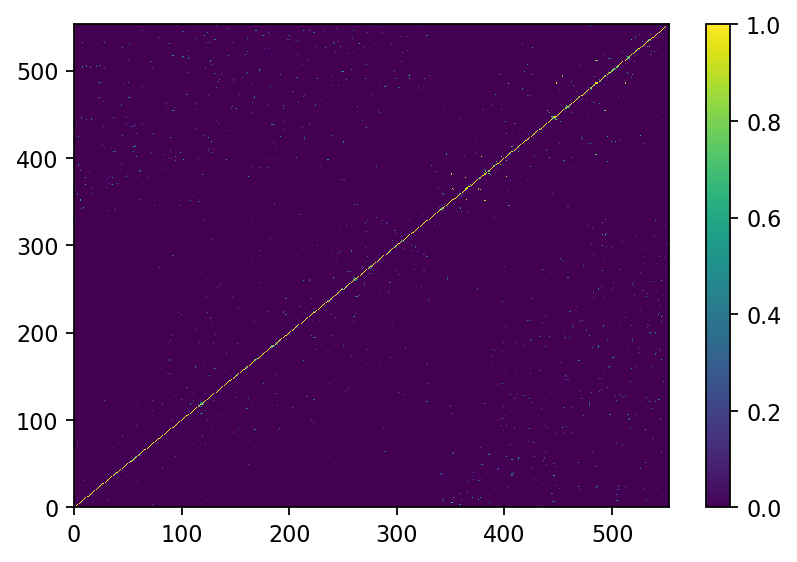

In [4]:
plt.pcolor(adjMatrix)
plt.colorbar()
plt.show()

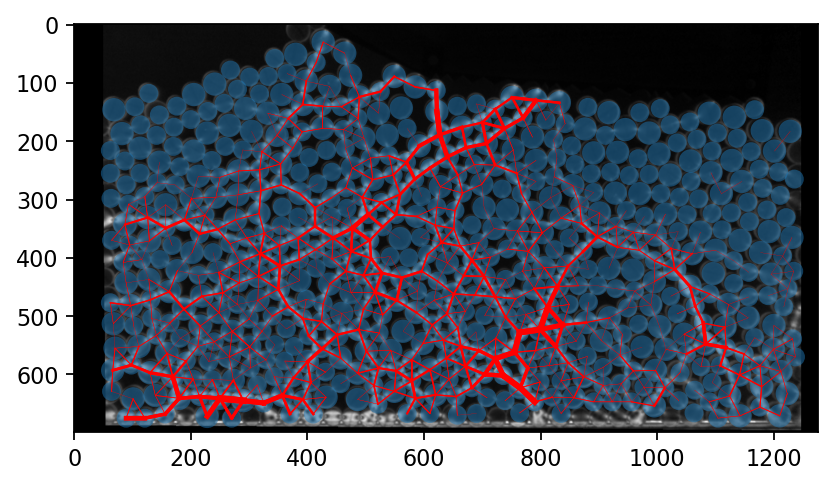

In [13]:
ax = Visualization.visualizeTrackedParticles(trackingData[0][frameIndex], photoelasticImageData[0][frameIndex])

# Now draw the connections
for i in range(len(adjMatrix)):
    for j in range(len(adjMatrix)):
        if adjMatrix[i][j]:
            ax.plot([pos_x[i], pos_x[j]], [pos_y[i], pos_y[j]], c='red', linewidth=adjMatrix[i,j]*3)
plt.savefig('images/network_sample.png')
plt.show()

In [14]:
partition = community_louvain.best_partition(graph, resolution=1, randomize=True)
partition = CommunityAnalysis.patchCommunityIndices(list(partition.values()))

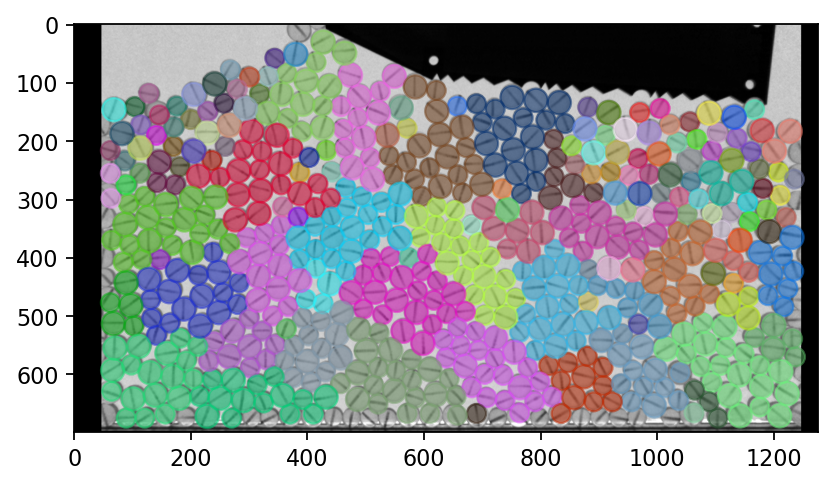

In [15]:
Visualization.visualizeTrackedParticlesAndCommunities(trackingData[0][frameIndex], partition, whiteLightImageData[0][frameIndex])
plt.savefig('images/comunnity_sample.png')
plt.show()